---

<div class="alert alert-primary alert-info">

# Frozen Lake $4\times4$ と $8\times8$

## Reinforcement Learning

</div>

<div class="alert alert-block alert-success">

- ### Value-Iteration
    
</div>

---

<img src='frozenlake.jpg' width=1000 height=50/>

---

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import gym

import typing

In [3]:
np.random.seed(1)

<div class="alert alert-primary alert-info">

## Non-slippery version

</div>

In the non-slippery version, the transitions are deterministic. $p_{ss'}^a = 1, \forall a \in A, \forall s \in S$ 

We can simplify the Bellman Optimality Equation.

$
\begin{align}
v_{*}(s) &:= \max_{\forall{a}} \{ R_{ss'}^a + \gamma \sum_{\forall{s'}} p_{ss'}^a v_{*}(s') \} \\
&\approx  \max_{\forall{a}} \{ R_{ss'}^a + \gamma v_{*}(s') \}
\end{align}
$

---

Let $\gamma$ be the discount factor. Terminates the search if $\Delta$ between state-values $\le \epsilon(1-\gamma) (\gamma^{-1})$, $\epsilon \in [0, 1]$, $\gamma \in (0, 1]$

---

In [4]:
def simplified_state_value_evaluation(state_values: np.ndarray) -> None:
    for state in range(env.nS - 1):
        best_state_value = 0.0
        for action in range(env.nA):
            _, next_state, reward, _ = env.P[state][action][0]
            best_state_value = max(best_state_value, reward + gamma * state_values[next_state])
        state_values[state] = best_state_value

In [5]:
def value_iteration(env: typing.Type[gym.Wrapper],
                    gamma: float,
                    epsilon: float,
                    state_value_evaluation: typing.Callable[[np.ndarray], None]) -> None:
    
    def print_state_values(n):
        print('\nState Values:')
        for state, value in enumerate(state_values):
            if state % n == 0:
                print()
            if state == env.nS - 1:
                print('Goal')
                break
            print(round(value, 4), end='\t')
        print()

    
    env.reset()
    print('Start:')
    env.render()
    
    state_values = np.zeros(env.nS)
    
    training_history = []

    iteration = 0
    
    while True:
        prev_state_values = state_values.copy()
        iteration += 1
        state_value_evaluation(state_values)
        delta = np.fabs(prev_state_values - state_values).max()
        training_history.append((iteration, delta))
        if delta <= epsilon * (1 - gamma) / gamma:
            print(f'\nNumber of Iterations: {iteration}')
            print(f'Delta: {delta}')
            print_state_values(np.sqrt(env.nS))
            break

    plt.figure(figsize=(10, 6))
    plt.xlabel('Iterations')
    plt.ylabel(r'$\Delta$ between iterations')
    plt.scatter(*zip(*training_history))
    plt.plot(*zip(*training_history));

---

### $4\times4$

---

Start:

SFFF
FHFH
FFFH
HFFG

Number of Iterations: 7
Delta: 0.0

State Values:

0.995	0.996	0.997	0.996	
0.996	0.0	0.998	0.0	
0.997	0.998	0.999	0.0	
0.0	0.999	1.0	Goal



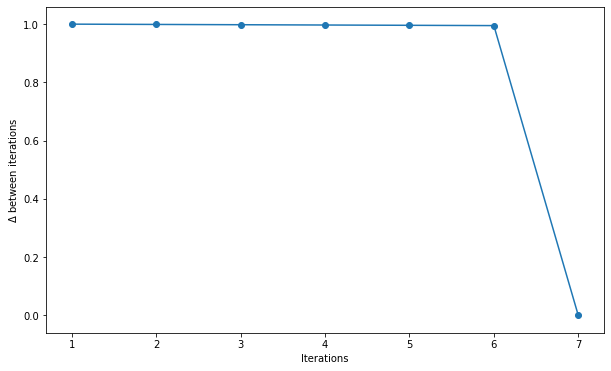

In [6]:
env = gym.make('FrozenLake-v0', is_slippery=False)

gamma = 0.999
epsilon = 0.01

value_iteration(env, gamma, epsilon, simplified_state_value_evaluation)

---

### $8\times8$

---

Start:

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Number of Iterations: 15
Delta: 0.0

State Values:

0.9871	0.9881	0.9891	0.99	0.991	0.992	0.993	0.994	
0.9881	0.9891	0.99	0.991	0.992	0.993	0.994	0.995	
0.9891	0.99	0.991	0.0	0.993	0.994	0.995	0.996	
0.99	0.991	0.992	0.993	0.994	0.0	0.996	0.997	
0.9891	0.99	0.991	0.0	0.995	0.996	0.997	0.998	
0.9881	0.0	0.0	0.995	0.996	0.997	0.0	0.999	
0.9891	0.0	0.993	0.994	0.0	0.998	0.0	1.0	
0.99	0.991	0.992	0.0	0.998	0.999	1.0	Goal



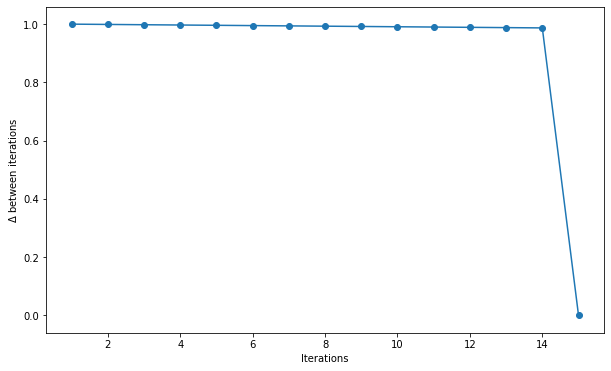

In [7]:
env = gym.make('FrozenLake8x8-v0', is_slippery=False)

gamma = 0.999
epsilon = 0.01

value_iteration(env, gamma, epsilon, simplified_state_value_evaluation)

---

<div class="alert alert-primary alert-info">

## Slippery when Wet

<img src='Slippery_when_wet.jpg' width=250 height=5/>

</div>

---

Bellman Optimality Equation.

$
\begin{align}
v_{*}(s) &:= \max_{\forall{a}} \{ \sum_{\forall{s'}} p_{ss'}^a (R_{ss'}^a + \gamma v_{*}(s')) \}
\end{align}
$

---

In [8]:
def state_value_evaluation(state_values: np.ndarray) -> None:
    for state in range(env.nS - 1):
        best_state_value = 0.0
        for action in range(env.nA):
            total_expected_state_values = 0.0
            for transition_probability, next_state, reward, _ in env.P[state][action]:
                total_expected_state_values += (transition_probability * (reward + gamma * state_values[next_state]))
            best_state_value = max(best_state_value, total_expected_state_values)
        state_values[state] = best_state_value

---

### $4\times4$

---

Start:

SFFF
FHFH
FFFH
HFFG

Number of Iterations: 244
Delta: 9.766677739331264e-06

State Values:

0.7854	0.7783	0.7737	0.7713	
0.7877	0.0	0.5056	0.0	
0.7925	0.7996	0.7447	0.0	
0.0	0.8641	0.9311	Goal



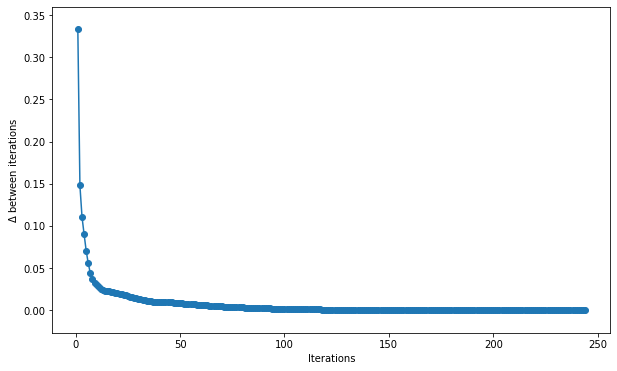

In [9]:
env = gym.make('FrozenLake-v0', is_slippery=True)
gamma = 0.999
epsilon = 0.01

value_iteration(env, gamma, epsilon, state_value_evaluation)

---

### $8\times8$

---

Start:

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Number of Iterations: 422
Delta: 9.892355212981485e-06

State Values:

0.8925	0.8952	0.8992	0.9038	0.9087	0.9137	0.9185	0.9223	
0.8919	0.8939	0.8973	0.9016	0.9064	0.9116	0.9175	0.9251	
0.8764	0.8621	0.8187	0.0	0.7776	0.8652	0.909	0.9306	
0.8636	0.8113	0.6991	0.4205	0.5636	0.0	0.8815	0.939	
0.8534	0.7107	0.4695	0.0	0.4945	0.5683	0.7992	0.9502	
0.8457	0.0	0.0	0.1527	0.353	0.413	0.0	0.9642	
0.8406	0.0	0.1641	0.1055	0.0	0.3188	0.0	0.9811	
0.8381	0.6118	0.3874	0.0	0.2718	0.5443	0.7715	Goal



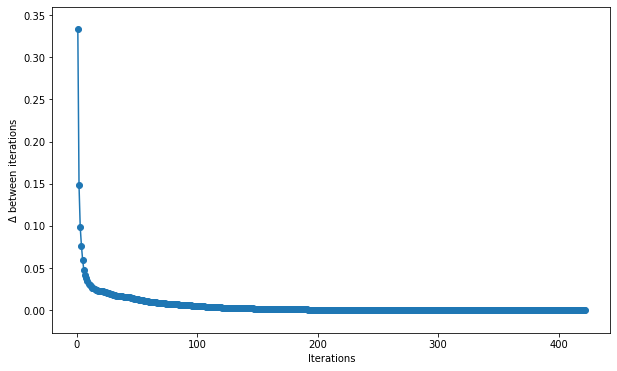

In [10]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)

gamma = 0.999
epsilon = 0.01

value_iteration(env, gamma, epsilon, state_value_evaluation)

---